In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# df['Churn'] = df['Churn'].map({ 'Yes': 1, 'No': 0 })

In [4]:
new_df = df[['Gender', 'Geography', 'Exited']]

## Univariate Analysis

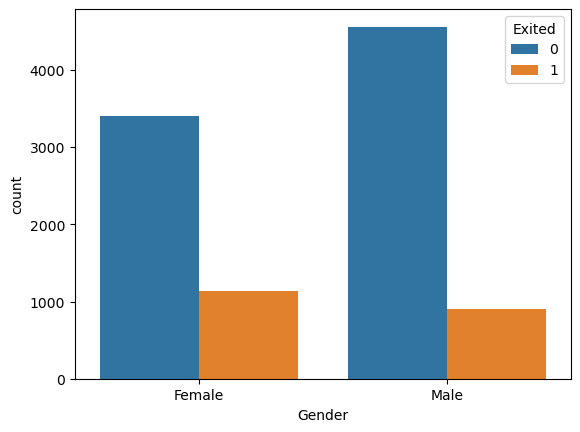

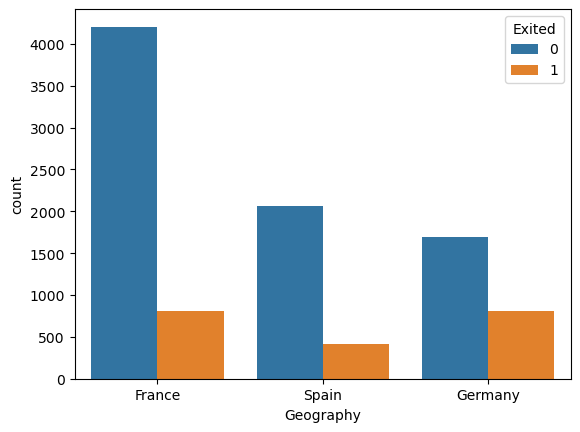

In [5]:
# graph the frequency of independent columns

for index, column_name in enumerate(new_df.drop(['Exited'], axis=1)):
    sns.countplot(x=new_df[column_name], hue=new_df['Exited'])
    plt.show()

## Bivariate Analysis

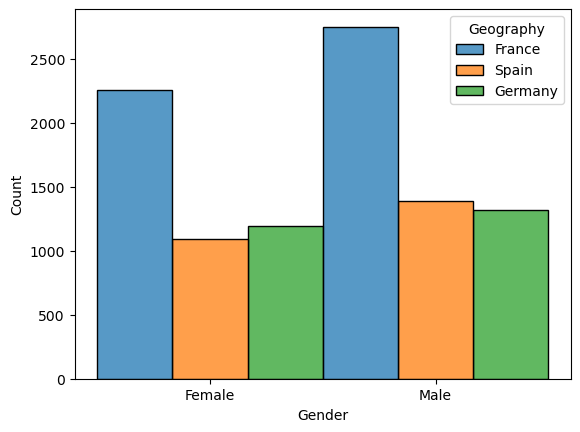

In [6]:
# 
sns.histplot(x='Gender', hue='Geography', multiple='dodge', data=new_df)
plt.show()

## Correlation matrix

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df_corr = df.select_dtypes(exclude='object').corr()

<Axes: >

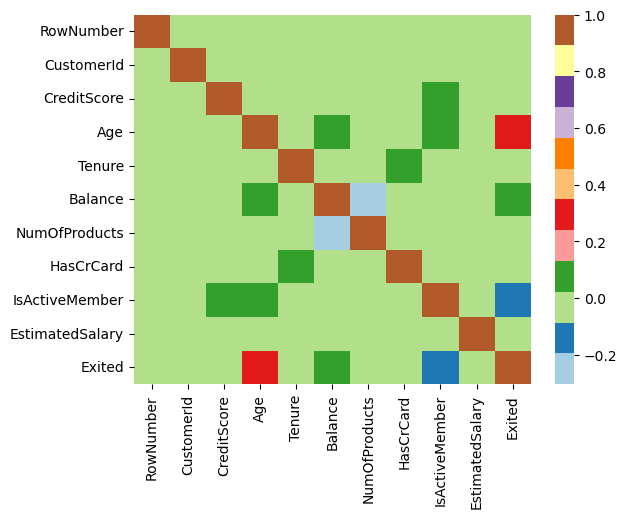

In [9]:
sns.heatmap(df_corr, cmap='Paired')

## Linear plot for original data and churned

<Axes: xlabel='Age'>

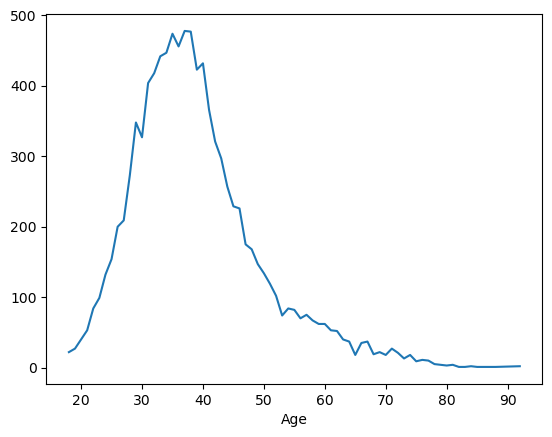

In [10]:
df['Age'].value_counts().sort_index().plot()

<Axes: xlabel='Age'>

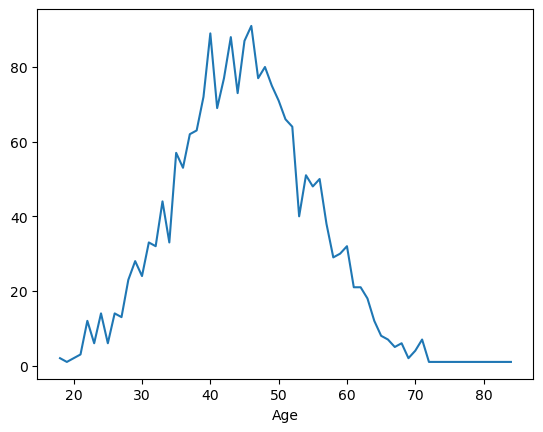

In [11]:
# churned data
df_churned = df[df['Exited'] == 1]
df_churned['Age'].value_counts().sort_index().plot()

## Kernel Density Estimate (KDE)

Text(0, 0.5, 'Frequency')

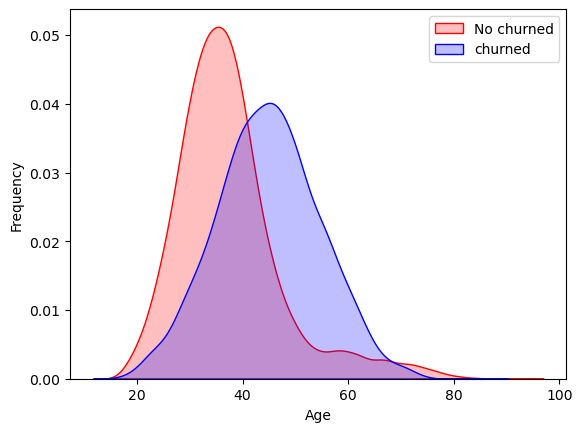

In [12]:
# watch observations frequency variation between churned and not churned people

tot = sns.kdeplot(df[df['Exited']==0]['Age'], color='red', fill=True)
tot = sns.kdeplot(df[df['Exited']==1]['Age'], color='blue', fill=True)

tot.legend(['No churned', 'churned'], loc='upper right')
tot.set_xlabel('Age')
tot.set_ylabel('Frequency')

## Feature Binning

In [13]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
bins = [0, 20, 40, 60, 100]
labels = ['0-20', '21-40', '41-60', 'Above 61']

In [15]:
df['Binned_Age'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

In [16]:
df[['Age', 'Binned_Age']].sample(5)

,Age,Binned_Age
3490,29,21-40
7591,30,21-40
6855,41,41-60
243,67,Above 61
4821,33,21-40


In [17]:
df['Binned_Age'].value_counts()

Binned_Age
21-40       6330
41-60       3117
Above 61     464
0-20          89
Name: count, dtype: int64

C:\Users\RAFAEL-PC\AppData\Local\Temp\ipykernel_17172\3187677807.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y[i], y[i])


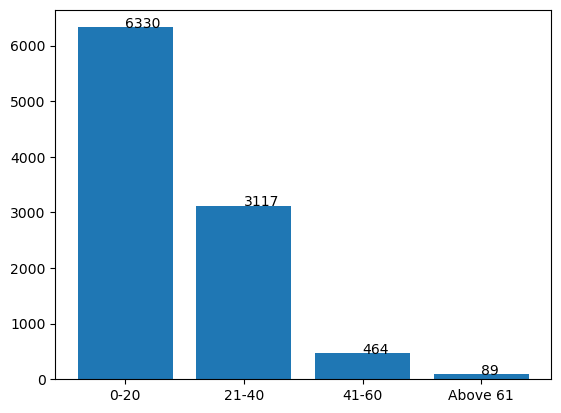

In [18]:
def add_text(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i])

plt.bar(labels, df['Binned_Age'].value_counts())
add_text(labels, df['Binned_Age'].value_counts())
# sns.barplot(data=df['Binned_Age'].value_counts())
plt.show()

In [19]:
df[df['Age'] < 21]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Binned_Age
57,58,15647091,Endrizzi,725,Germany,Male,19,0,75888.20,1,0,0,45613.75,0,0-20
233,234,15723886,Fiore,767,Germany,Male,20,3,119714.25,2,0,1,150135.38,0,0-20
746,747,15787619,Hsieh,844,France,Male,18,2,160980.03,1,0,0,145936.28,0,0-20
923,924,15601026,Gallagher,572,Germany,Female,19,1,138657.08,1,1,1,16161.82,0,0-20
1064,1065,15699598,Smith,723,France,Female,20,4,0.00,2,1,1,140385.33,0,0-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9586,9587,15786418,Chiu,546,France,Female,20,6,0.00,1,0,1,20508.85,0,0-20
9679,9680,15605067,Nwachinemelu,472,France,Male,19,9,0.00,2,1,0,3453.40,0,0-20
9782,9783,15728829,Weigel,509,France,Male,18,7,102983.91,1,1,0,171770.58,0,0-20
9932,9933,15813451,Fleetwood-Smith,677,Spain,Male,18,8,134796.87,2,1,1,114858.90,0,0-20


## Encoding

### Label Encoding

In [20]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Binned_Age
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-60
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-60
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-60
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,21-40
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-60


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [22]:
df['Gender_le'] = le.fit_transform(df['Gender'])

In [23]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Binned_Age,Gender_le
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-60,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-60,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-60,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,21-40,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-60,0


In [24]:
df['Gender_le'].value_counts()

Gender_le
1    5457
0    4543
Name: count, dtype: int64

### One hot encoding

In [25]:
# pandas way
ohe_pandas = pd.get_dummies(df['Geography'], dtype='int8')
ohe_pandas

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [26]:
pd.concat([df, ohe_pandas], axis=1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Binned_Age,Gender_le,France,Germany,Spain
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-60,0,1,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-60,0,0,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-60,0,1,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,21-40,0,1,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-60,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,21-40,1,1,0,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,21-40,1,1,0,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,21-40,0,1,0,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,41-60,1,0,1,0


In [27]:
# scikit learn way (deepseek)
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
# ohe = OneHotEncoder()

In [28]:
ohe_result = ohe.fit_transform(df[['Geography']])


In [29]:
ohe_result.data

In [30]:
ohe_df = pd.DataFrame(ohe_result, columns=ohe.get_feature_names_out(['Geography']))

In [31]:
ohe_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


### Target Encoding

### Install coder encoder library

In [32]:
!pip install category-encoder

ERROR: Could not find a version that satisfies the requirement category-encoder (from versions: none)
ERROR: No matching distribution found for category-encoder


In [33]:
from category_encoders import TargetEncoder

te_model = TargetEncoder()

In [34]:
df['Gender_te'] = te_model.fit_transform(df['Gender'], df['Exited'])

In [35]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Binned_Age,Gender_le,Gender_te
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-60,0,0.250715
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-60,0,0.250715
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-60,0,0.250715
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,21-40,0,0.250715
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-60,0,0.250715


In [36]:
from category_encoders.hashing import HashingEncoder

he_model = HashingEncoder()

In [37]:
he_model.fit_transform(df['Geography'], df['Exited'])

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
9995,0,1,0,0,0,0,0,0
9996,0,1,0,0,0,0,0,0
9997,0,1,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,1
